In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
from tabulate import tabulate
warnings.filterwarnings('ignore')

###Uploading Multi-Class Dataset from UCI Library

In [2]:
dataset = pd.read_csv('/content/Dry_Bean_Dataset.csv')
dataset.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


###Pre-processing the Dataset

In [3]:
dataset['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [4]:
dataset['Class'] = pd.Categorical(dataset['Class'], categories=['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SIRA'])
dataset['Class'] = dataset['Class'].cat.codes
X = dataset.iloc[:,0:-1]
y = dataset['Class']

###Dividing the Dataset into 70-30 for Training and Testing with 10 Different Samples

In [5]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))
#print(samples)

### Optimizing the SVM for every Sample with 1000 iterations and Calculating the Best Parameters

In [6]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    if score>best_accuracy:
      best_accuracy = score
      best_C = C
      best_gamma = gamma
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.7091087169441724 Best Kernel =  linear Best Nu =  1.6227216944394518 Best Epsilon =  7.941511932547678
Best Accuracy =  0.49069539666993145 Best Kernel =  linear Best Nu =  3.6451717195587774 Best Epsilon =  1.3919969924754982
Best Accuracy =  0.5815377081292851 Best Kernel =  linear Best Nu =  8.519852924619714 Best Epsilon =  4.798290122784442
Best Accuracy =  0.558765915768854 Best Kernel =  linear Best Nu =  3.2346478472556894 Best Epsilon =  9.802090891392215
Best Accuracy =  0.3981390793339863 Best Kernel =  linear Best Nu =  0.4143723671345212 Best Epsilon =  5.235248190955872
Best Accuracy =  0.5288932419196866 Best Kernel =  linear Best Nu =  2.944943212376465 Best Epsilon =  0.40497764267358516
Best Accuracy =  0.4015670910871694 Best Kernel =  linear Best Nu =  5.1384240441851965 Best Epsilon =  1.4511157171214217
Best Accuracy =  0.4341332027424094 Best Kernel =  linear Best Nu =  6.116171248365352 Best Epsilon =  5.303527882091097
Best Accuracy =  0.4304

###Comparative Performance of Optimized-SVM with Different Samples  

In [7]:
print(tabulate(result, headers='keys', tablefmt='psql',showindex=False))

+----------+-----------------+---------------+-----------+----------------+
|   Sample |   Best Accuracy | Best Kernel   |   Best Nu |   Best Epsilon |
|----------+-----------------+---------------+-----------+----------------|
|        1 |        0.709109 | linear        |  1.62272  |       7.94151  |
|        2 |        0.490695 | linear        |  3.64517  |       1.392    |
|        3 |        0.581538 | linear        |  8.51985  |       4.79829  |
|        4 |        0.558766 | linear        |  3.23465  |       9.80209  |
|        5 |        0.398139 | linear        |  0.414372 |       5.23525  |
|        6 |        0.528893 | linear        |  2.94494  |       0.404978 |
|        7 |        0.401567 | linear        |  5.13842  |       1.45112  |
|        8 |        0.434133 | linear        |  6.11617  |       5.30353  |
|        9 |        0.43046  | linear        |  4.30302  |       4.01403  |
|       10 |        0.266895 | linear        |  9.822    |       5.23512  |
+----------+

### Convergence Graph of best SVM

In [8]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))
print(train_sizes)

[  85  258  432  605  778  951 1125 1298 1471 1644 1818 1991 2164 2337
 2510 2684 2857 3030 3203 3377 3550 3723 3896 4070 4243 4416 4589 4762
 4936 5109 5282 5455 5629 5802 5975 6148 6322 6495 6668 6841 7014 7188
 7361 7534 7707 7881 8054 8227 8400 8574]


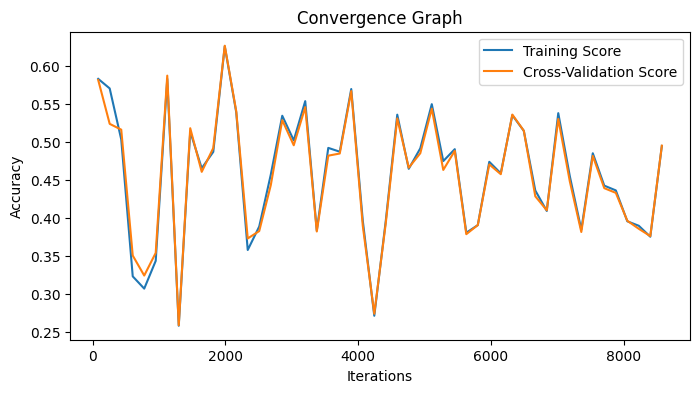

In [9]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc='best')
plt.show()